<a href="https://colab.research.google.com/github/syedokun/HAD7001/blob/main/Project/Project_Phase_3_wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the text

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import os
from PyPDF2 import PdfReader

def extract_text_from_pdf(pdf_path):
    try:
        with open(pdf_path, 'rb') as f:
            pdf_reader = PdfReader(f)
            text = ""
            for page in pdf_reader.pages:
                text += page.extract_text()
            return text
    except Exception as e:
        print(f"Error processing {pdf_path}: {e}")
        return None


folder_path = '/Users/syedokun/Downloads/UofT/Winter 2024/Applied ML/Project/Phase 3 word cloud'

pdf_files = [f for f in os.listdir(folder_path) if f.endswith('.pdf')]

all_text = ""

for pdf_file in pdf_files:
  pdf_path = os.path.join(folder_path, pdf_file)
  text = extract_text_from_pdf(pdf_path)
  if text:
    all_text += text

## Cleaning

In [ ]:
# Define a cleaning function that will replace the incorrectly encoded characters.
def clean_encoding(text):
    text = text.replace('¡¯', "'")
    return text

all_text = clean_encoding(all_text)

In [ ]:
import contractions

all_text = contractions.fix(all_text)

In [ ]:
import re

# Function to remove URLs
def remove_url(text):
    return re.sub(r'http\S+', '', text)

# Function to remove special characters and numbers
def remove_special_characters(text):
    return re.sub(r'[^A-Za-z\s]', '', text)

all_text = remove_url(all_text)
all_text = remove_special_characters(all_text)
all_text = all_text.lower()

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')

tokens = word_tokenize(all_text)

[nltk_data] Downloading package punkt to /Users/syedokun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/syedokun/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
# Lemmatize tokens
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

tokens = lemmatize_tokens(tokens)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/syedokun/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
context_sensitive_stop_words = set(['large', 'language', 'model', 'mental', 'health', 'electronic', 'health', 'record,' 'et', 'al', 'llm', 'embedding', 'gpt',
                                    'ehr', 'patient', 'data', 'dataset', 'response', 'user', 'using', 'chatbot', 'study', 'mindguard',
                                    'performance', 'analysis', 'training', 'c', 'j', 'e', 'f', 'b', 'p', 'wa', 'ha', 'eg', 'pr', 'ml', 'text', 'provide', 'task', 'based', 'clinical',
                                    'application', 'support', 'social', 'medium', 'embeddings', 'research', 'healthcare', 'evaluation', 'chatgpt', 'llama',
                                    'accuracy', 'figure', 'bert', 'ehrs', 'chatbots', 'classification', 'recall', 'precision', 'ai'])
stop_words_set = set(stopwords.words('english'))

def remove_all_stop_words(tokens):
    all_stop_words = stop_words_set | context_sensitive_stop_words
    return [token for token in tokens if token.lower() not in all_stop_words]

tokens = remove_all_stop_words(tokens)

## Wordcloud

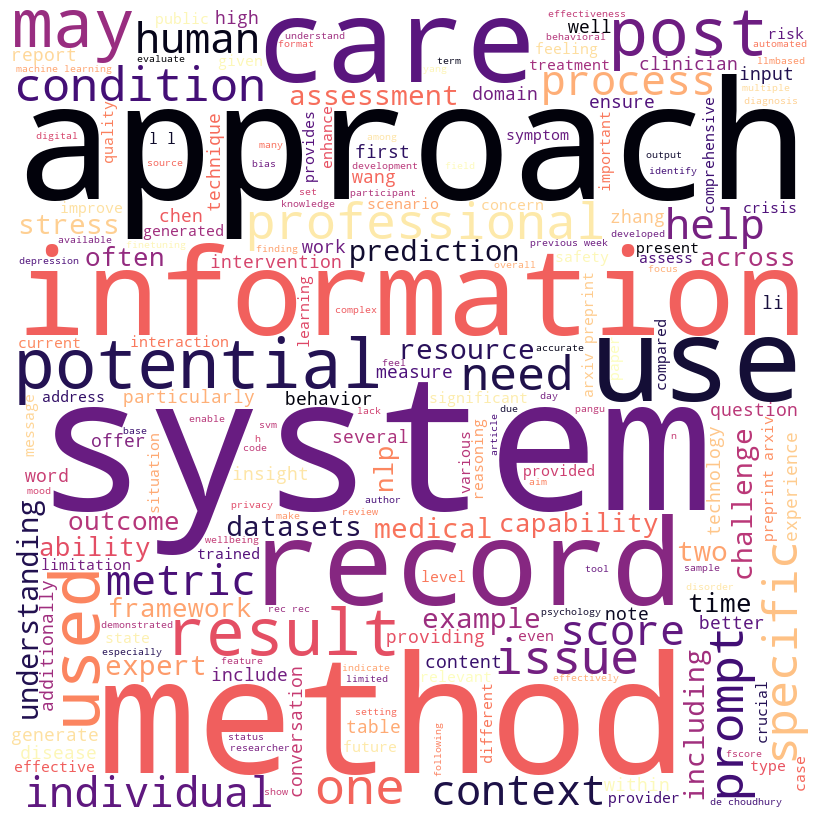

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_cloud_text = ' '.join(tokens)

wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='magma',
                      min_font_size = 10).generate(word_cloud_text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()